In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('IMDb Movies India.csv', encoding='ISO-8859-1')
print(df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

Shape of the dataset: (15509, 10)
Missing values in each column:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
count    7919.000000
mean        5.841621
std         1.381777
min         1.100000
25%         4.900000
50%         6.000000
75%         6.800000
max        10.000000
Name: Rating, dtype: float64


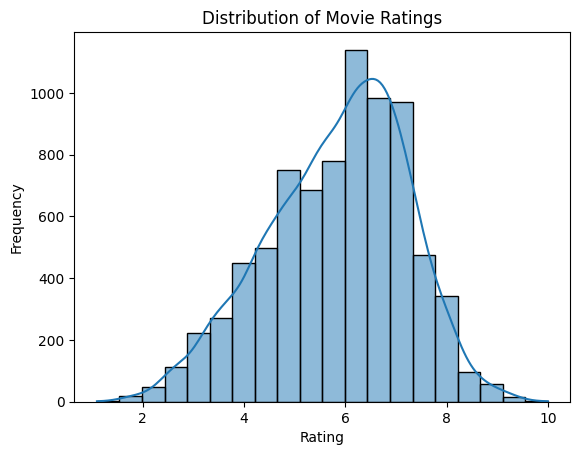

In [11]:
# Check the shape of the data
print(f"Shape of the dataset: {df.shape}")

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Display basic statistics of the 'Rating' column
print(df['Rating'].describe())

# Visualize the distribution of movie ratings
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [13]:
# Drop rows with missing values for simplicity
df = df.dropna()

# Select relevant features for prediction
# Ensure these columns exist in the dataset
selected_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Rating']
df = df[selected_features]

# Encode categorical features using Label Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for feature in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    df[feature] = encoder.fit_transform(df[feature])

# Display the transformed data
print(df.head())


   Genre  Director  Actor 1  Actor 2  Actor 3  Rating
1    229       629     1352     2272      319     7.0
3    184      1335     1198      719     2148     4.4
5    157      1530      378       75     2045     4.7
6    289      2044      692     1112     2524     7.4
8    320       135     1934     1175     1013     5.6


In [14]:
# Define features (X) and target variable (y)
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = df['Rating']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
from sklearn.linear_model import LinearRegression

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)


Mean Squared Error: 1.824204245176786
R-squared Score: 0.014872145511032775


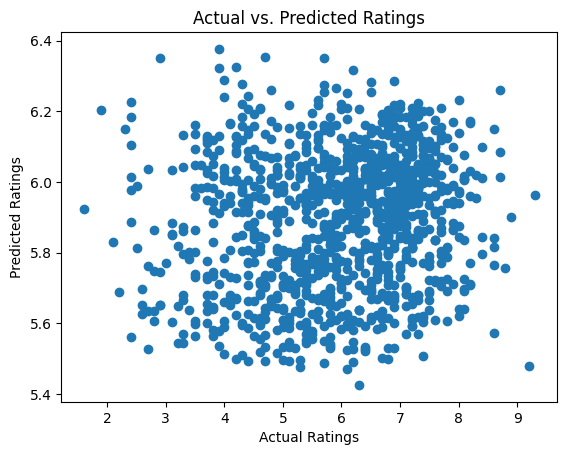

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot actual vs. predicted ratings
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()
